In [1]:
import glob
import os
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
import yaml
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy import stats


plt.style.use(["science", "nature"])
import pickle

: 

In [2]:
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 6
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 5
plt.rcParams['hatch.linewidth'] = 0.5

In [3]:
%matplotlib widget

In [22]:
tool_map = {
    "scapa": "scAPA",
    "scapatrap": "scAPAtrap",
    "sierra": "Sierra",
    "maaper": "MAAPER",
    "scapture": "SCAPTURE",
    "scape": "SCAPE",
    "infernape": "Infernape",
}

protocol_map = {
    "Visium": "10X Visium",
    "VisiumHD": "10X Visium HD",
    "Chromium": "10X Chromium",
    "Dropseq": "Drop-seq",
    "Stereoseq": "Stereo-seq",
    "Slideseq": "Slide-seq V2",
    "SpatialTranscriptomics": "ST",
    "Microwell": "Microwell-seq",
}

protocol_order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium","Stereo-seq", "Slide-seq V2", "ST"]
# tool_order = ["scAPA", "scAPAtrap", "Sierra", "SCAPTURE", "SCAPE", "Infernape"]
tool_order = ["SCAPE", "scAPAtrap", "Infernape",  "scAPA", "SCAPTURE", "Sierra"]
# order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium", "10X Visium HD","Stereo-seq", "Slide-seq V2", "Spatial Transcriptomics"]

color = [
    "#386b98",
    "#269a51",
    "#edaa4d",
    "#d34123",
    "#7e648a",
    "#454545",
    "#929292",
]
palette=sns.color_palette(color, 7)
mm=1/25.4

In [5]:
match_performance_df = pd.read_csv("/root/apabenchmark/data/raw_bam_result/match_performance.tsv", sep="\t")
match_performance_df["tool"] = match_performance_df["tool"].map(tool_map)
match_performance_df["protocol"] = match_performance_df["protocol"].map(protocol_map)

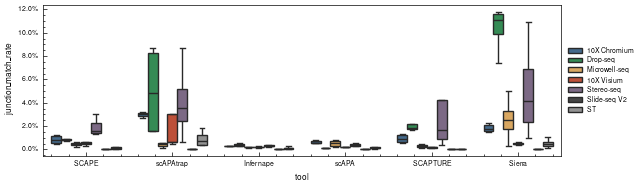

In [24]:
from matplotlib.ticker import PercentFormatter
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(170*mm, 50*mm))
sns.boxplot(
    data=match_performance_df,
    x="tool",
    y="junction_match_rate",
    hue="protocol",
    order=tool_order,
    hue_order=protocol_order,
    palette=palette,
    fliersize=0
)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

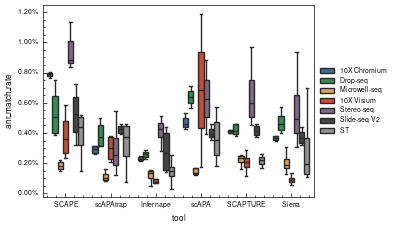

In [21]:
from matplotlib.ticker import PercentFormatter
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))
sns.boxplot(
    data=match_performance_df,
    x="tool",
    y="anr_match_rate",
    hue="protocol",
    order=tool_order,
    hue_order=protocol_order,
    palette=palette,
    fliersize=0
)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))